<a href="https://colab.research.google.com/github/EminIsmayilzada/Machine-Learning/blob/main/Unsupervised_and_Semi_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])

blob_std = np.array([0.3, 0.3, 0.1, 0.1, 0.1])  # Now has 5 values

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred[:5]

array([1, 1, 4, 1, 1], dtype=int32)

In [2]:
X.shape

(2000, 2)

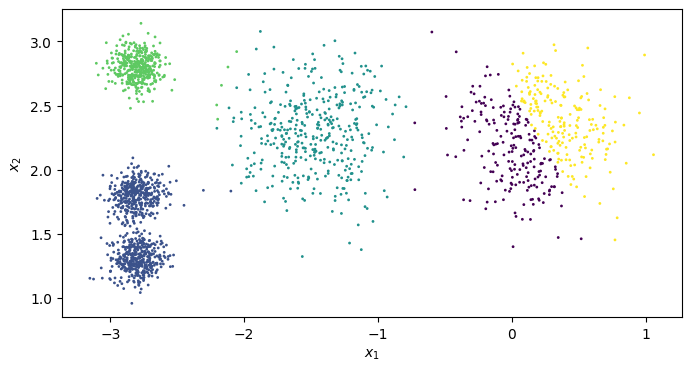

In [3]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
  plt.figure(figsize=(8,4))
  plt.scatter(X[:,0], X[:,1], c=y, s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")

plot_clusters(X, y_pred)
plt.show()

In [4]:
kmeans.cluster_centers_

array([[-0.01482067,  2.1532017 ],
       [-2.80214068,  1.55162671],
       [-1.47774837,  2.28453892],
       [-2.79290307,  2.79641063],
       [ 0.39846257,  2.38096728]])

In [5]:
kmeans.labels_

array([1, 1, 4, ..., 3, 4, 1], dtype=int32)

In [6]:
import numpy as np

X_new=np.array([[0,2], [3,2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 3, 3], dtype=int32)

In [7]:
kmeans.transform(X_new)

array([[0.15391691, 2.83778629, 1.5048929 , 2.9042344 , 0.55127896],
       [3.01871073, 5.81943941, 4.48677978, 5.84739223, 2.62928375],
       [3.10296036, 1.4618254 , 1.68200315, 0.29040966, 3.45438119],
       [3.00525617, 0.96879317, 1.53742431, 0.36159148, 3.40054652]])

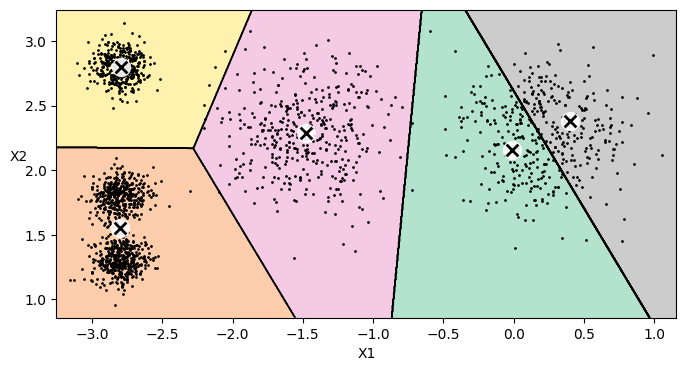

In [8]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("X1")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("X2", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

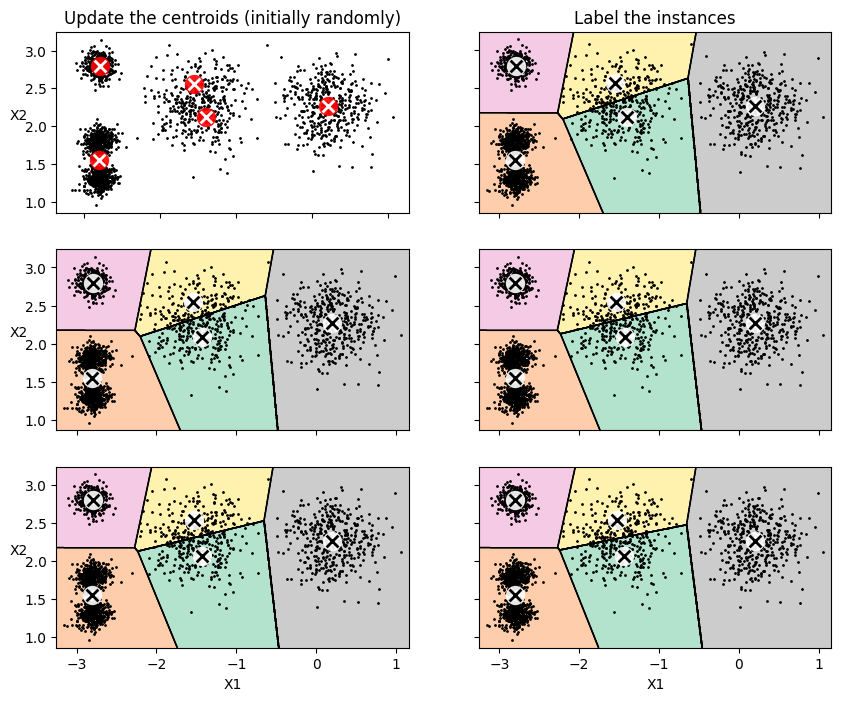

In [9]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("X2", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()


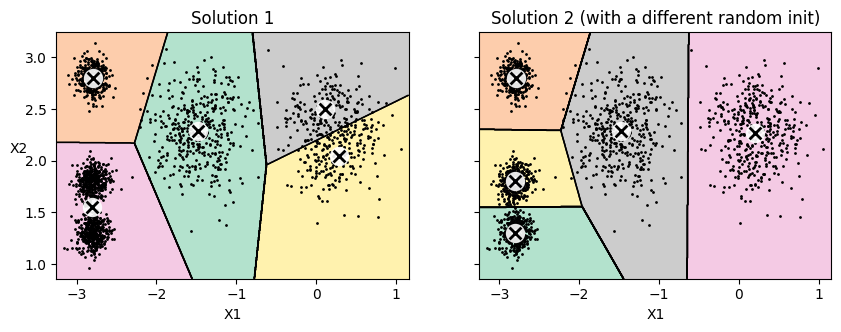

In [10]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")


plt.show()

In [11]:
good_init=np.array([[-3, 3], [-3, 2], [-3, 1], [-1,2], [0, 2]])
kmeans=KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

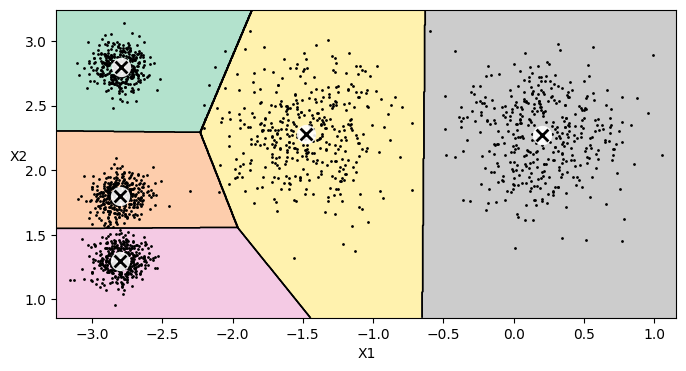

In [12]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

In [13]:
kmeans.inertia_

160.621474224147

In [14]:
kmeans.score(X)

-160.62147422414697

#Mini Batch K-Means

In [15]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans=MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [16]:
minibatch_kmeans.inertia_

160.67686862668893

#Choosing the optimal number of clusters

In [17]:
kmeans_per_k=[KMeans(n_clusters=k, random_state=42).fit(X)
              for k in range(1,10)]
inertias=[model.inertia_ for model in kmeans_per_k]

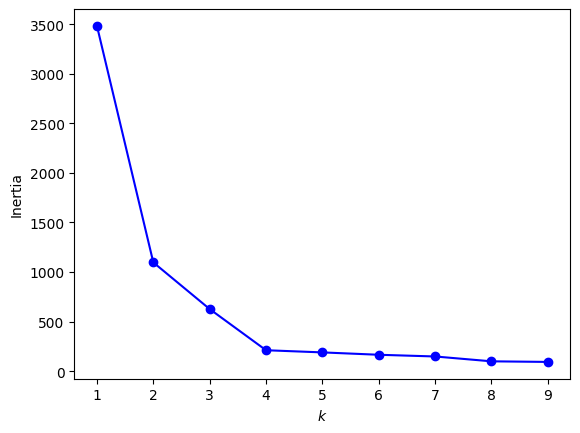

In [18]:
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores=[silhouette_score(X, model.labels_)
                  for model in kmeans_per_k[1:]]

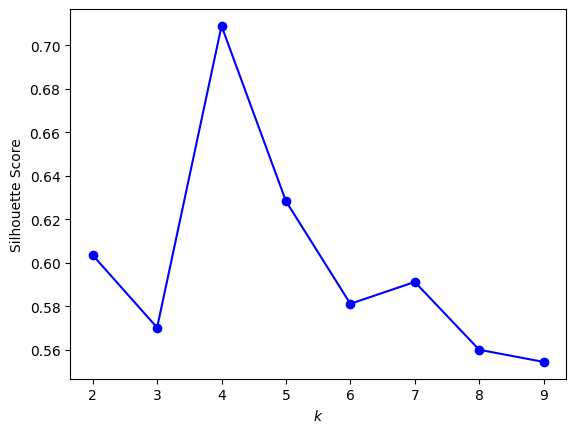

In [20]:
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette Score")
plt.show()

In [22]:
import PIL

image = np.asarray(PIL.Image.open("/content/ladybug.png"))
image.shape

(533, 800, 3)

In [23]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

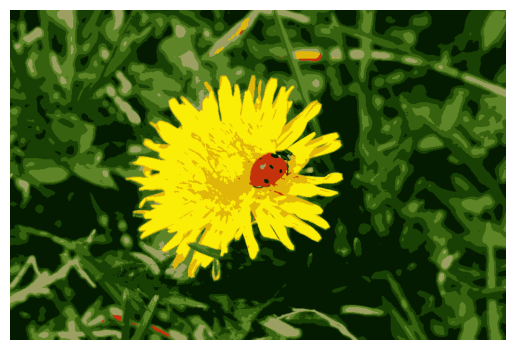

In [29]:
plt.imshow(segmented_img/255)
plt.axis('off');

In [24]:
kmeans.labels_

array([0, 0, 0, ..., 5, 5, 0], dtype=int32)

In [25]:
kmeans.cluster_centers_

array([[  5.6105612 ,  27.61743918,   1.44857047],
       [250.68280046, 237.8319458 ,   6.51237711],
       [ 54.37997208,  97.09151272,  14.07131629],
       [155.1122467 , 160.29920705,  98.37997063],
       [ 93.53208815, 132.47927103,  39.06947451],
       [ 24.39502109,  63.41611633,   4.09118396],
       [195.12454743,  50.81607531,  11.20057929],
       [223.40683449, 182.94424185,   9.39848253]])

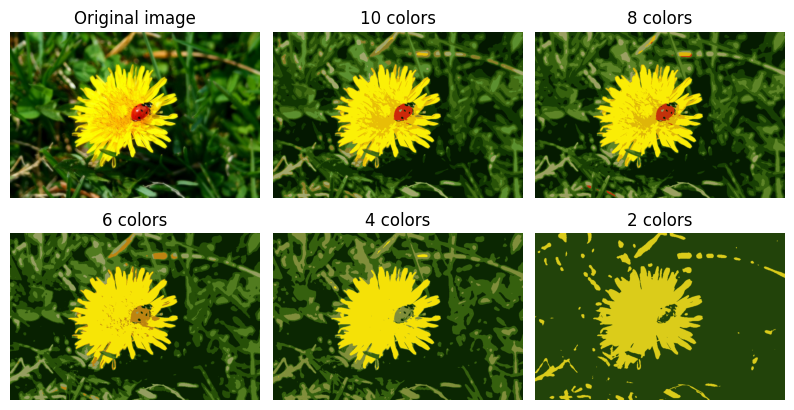

In [32]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

#Semi-Supervised Learning for Clustering


In [30]:
from sklearn.datasets import load_digits
np.random.seed(42)
X_digits, y_digits= load_digits(return_X_y=True)
X_train, y_train=X_digits[:1400], y_digits[:1400]
X_test, y_test=X_digits[1400:], y_digits[1400:]

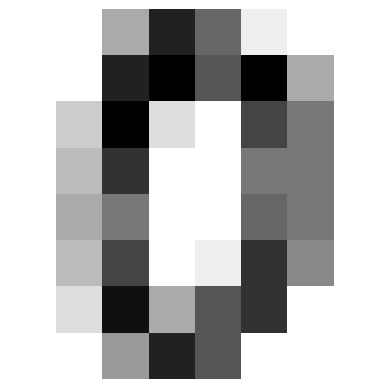

In [31]:
plt.imshow(X_train[0].reshape(8,8), cmap="binary")
plt.axis('off')
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression

n_labeled=50

log_reg=LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.7581863979848866

In [34]:
log_reg_full=LogisticRegression(max_iter=10000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

In [54]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

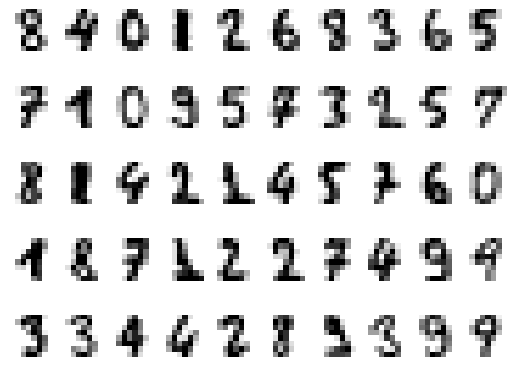

In [55]:
for idx, image in enumerate(X_representative_digits):
  plt.subplot(5,10, idx+1)
  plt.imshow(image.reshape(8,8), cmap="binary")
  plt.axis('off')
plt.show()

In [56]:
y_representative_digits=np.array([
    8,4,0,1,2,6,8,3,6,5,
    7,1,0,9,5,7,3,2,5,7,
    8,1,4,2,1,4,5,7,6,0,
    1,8,7,1,2,2,7,4,9,9,
    3,3,4,4,2,8,9,3,9,9
])

In [57]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8614609571788413

In [58]:
y_train_propagated=np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i]=y_representative_digits[i]

In [59]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8488664987405542

In [60]:
(y_train_propagated==y_train).mean()

0.9478571428571428

In [61]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [62]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8513853904282116

#DBSCAN

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y= make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan=DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [65]:
dbscan.labels_[:15]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2])

In [66]:
dbscan.core_sample_indices_[:15]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19])

In [67]:
dbscan.components_[:15]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       [ 0.29248724, -0.20696309],
       [-0.02637836,  0.44766267],
       [ 1.6201408 , -0.28758856],
       [ 1.26718285, -0.40793471],
       [ 0.87418608,  0.50781041],
       [ 0.3322007 , -0.19032202],
       [ 1.952812  ,  0.22552333],
       [ 1.9797373 ,  0.0831513 ],
       [-0.20280226,  1.02277576],
       [ 1.7895881 , -0.16231967],
       [ 1.0280974 , -0.4830331 ],
       [-0.41546771,  0.93423658]])

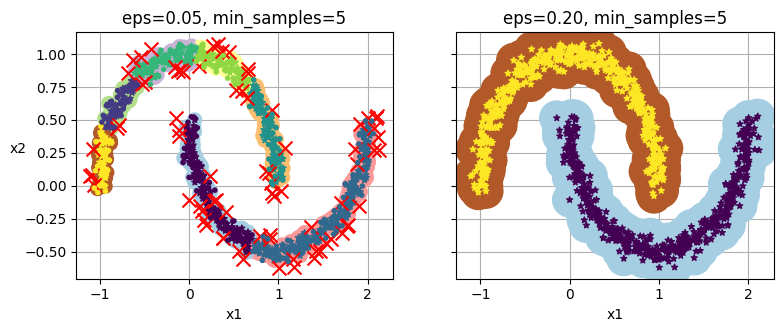

In [71]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("x1")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("x2", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [70]:
X_new=np.array([[-0.5, 0], [0, 0.5], [1,-0.1], [2,1]])
knn.predict(X_new)

array([6, 0, 3, 2])